In [ ]:
# Import drive
from google.colab import drive
drive.mount('/content/drive')

# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
from scipy.io import wavfile as wav
import os
import sys
from tqdm import tqdm

Mounted at /content/drive


In [ ]:
pip install resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.5 MB/s eta 0:00:00


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
audio_path='/content/drive/MyDrive/UrbanSound8K/audio'

In [ ]:
data['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [ ]:
# Play two aduio files in the dataset.
dog = glob('/content/drive/MyDrive/UrbanSound8K/audio/fold2/100652-3-0-2.wav')


In [ ]:
ipd.Audio(dog[0])


In [ ]:
wave_sample_rate,wave_audio=wav.read('/content/drive/MyDrive/UrbanSound8K/audio/fold2/100652-3-0-2.wav')

In [ ]:
wave_audio

array([[-182,  127],
       [-194,   28],
       [-133,   -2],
       ...,
       [1800, -129],
       [1090, -233],
       [ 390, -192]], dtype=int16)

**Audio file visualizing**

In [ ]:
y, sr = librosa.load(dog[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-0.0013542  -0.00175348 -0.00066222 -0.00073858 -0.00182954 -0.00503648
 -0.00767879 -0.00461688 -0.00097825  0.00422199]
shape y: (88200,)
sr: 22050


<Axes: title={'center': 'Raw Dog Audio Example'}>

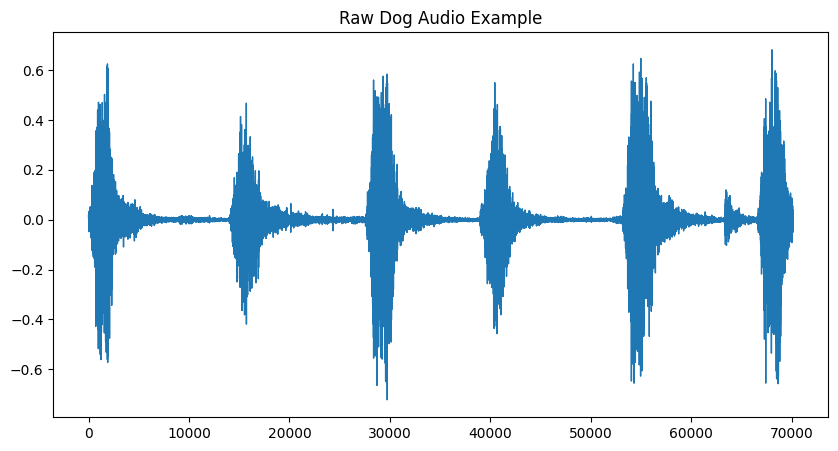

In [ ]:
y_trimmed,_=librosa.effects.trim(y,top_db=10)
pd.Series(y_trimmed).plot(figsize=(10,5),lw=1,title="Raw Dog Audio Example")

<Axes: title={'center': 'Raw Dog Audio Example'}>

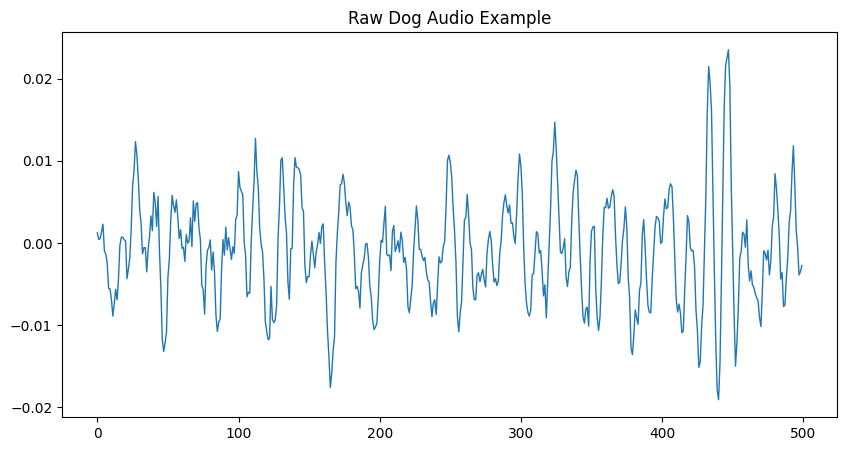

In [ ]:
# Zoomed in dog audio file
pd.Series(y[30000:30500]).plot(figsize=(10,5),lw=1,title="Raw Dog Audio Example")

**Spectogram**

In [ ]:
D=librosa.stft(y)
db=librosa.amplitude_to_db(np.abs(D),ref=np.max)
db.shape

(1025, 173)

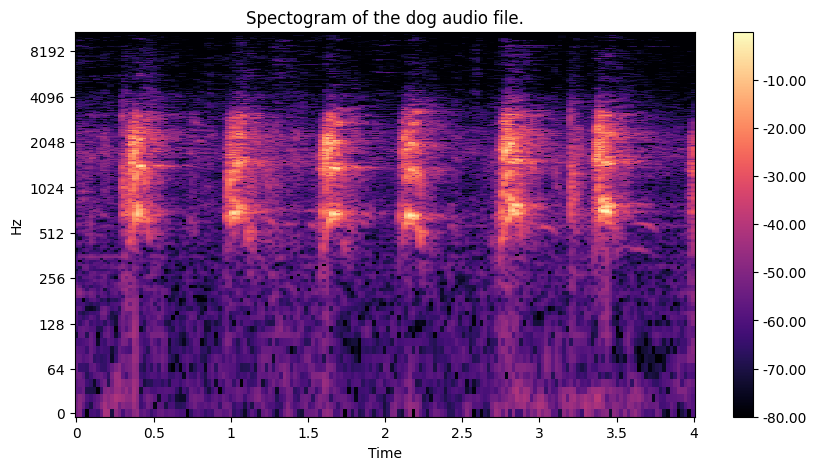

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
hz_plot=librosa.display.specshow(db,x_axis='time',y_axis='log',ax=ax)
ax.set_title("Spectogram of the dog audio file.")
fig.colorbar(hz_plot,ax=ax,format=f'%0.2f')
plt.show()

**Mel Spectrogram**

In [ ]:
S = librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128*2,)
mel=librosa.amplitude_to_db(np.abs(S),ref=np.max)

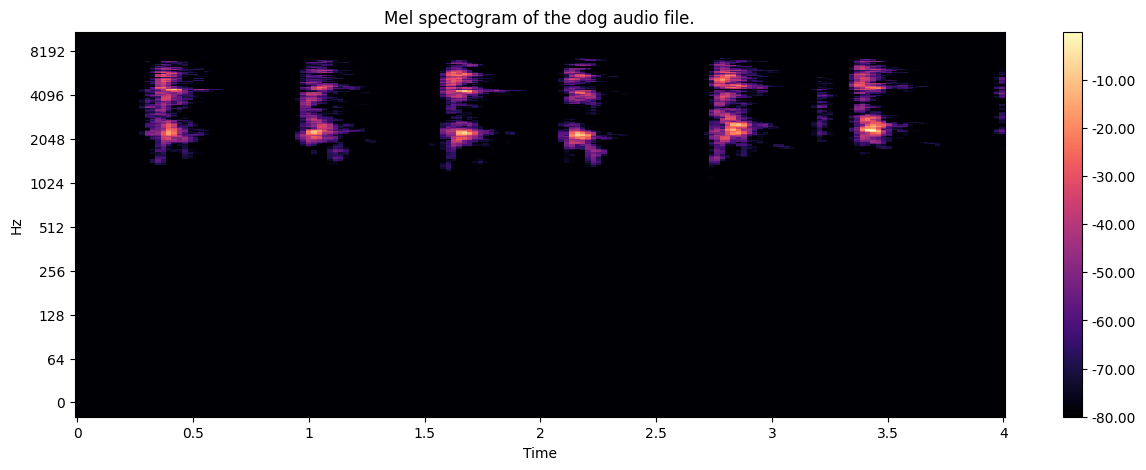

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
plot=librosa.display.specshow(mel,x_axis='time',y_axis='log',ax=ax)
ax.set_title("Mel spectogram of the dog audio file.")
fig.colorbar(hz_plot,ax=ax,format=f'%0.2f')
plt.show()

**Audio file preprocessing**

Here, we preprocessed the audio of dog barking.

In [ ]:
signal,sr=librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold2/100652-3-0-2.wav')

In [ ]:
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
mfccs.shape

(40, 173)

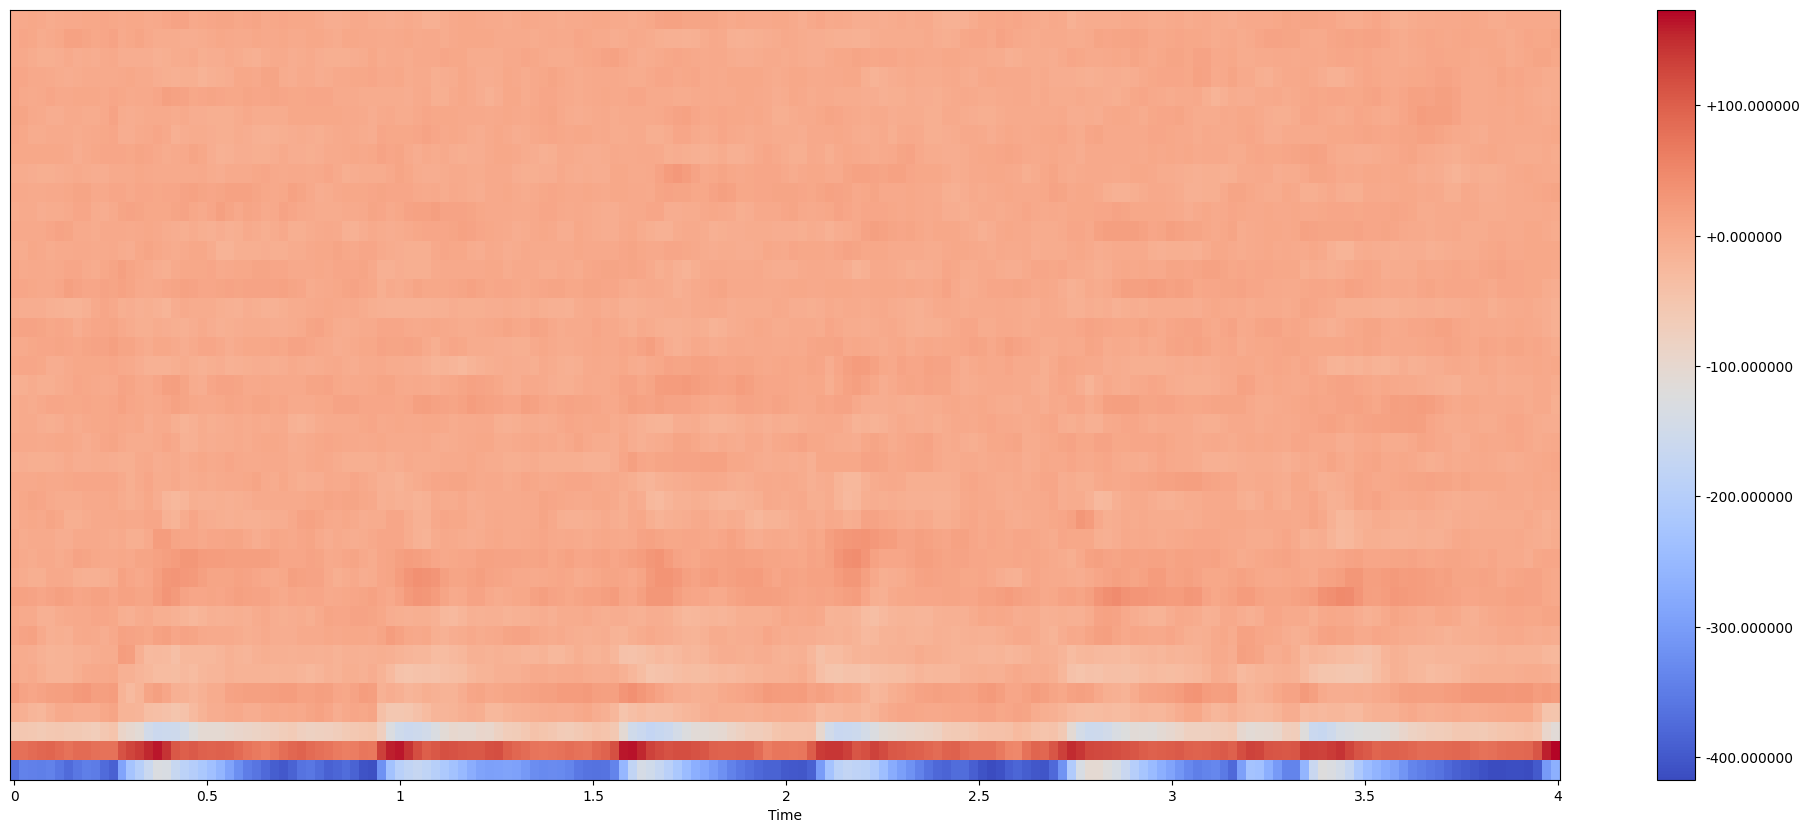

In [ ]:
# Visualize MFCCS
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs,x_axis='time',sr=sr)
plt.colorbar(format='%+2f')
plt.show()

In [ ]:
# Delta and delt2 MFCCs
delta_mfccs=librosa.feature.delta(mfccs)
delta2_mfccs=librosa.feature.delta(mfccs,order=2)
delta_mfccs.shape

(40, 173)

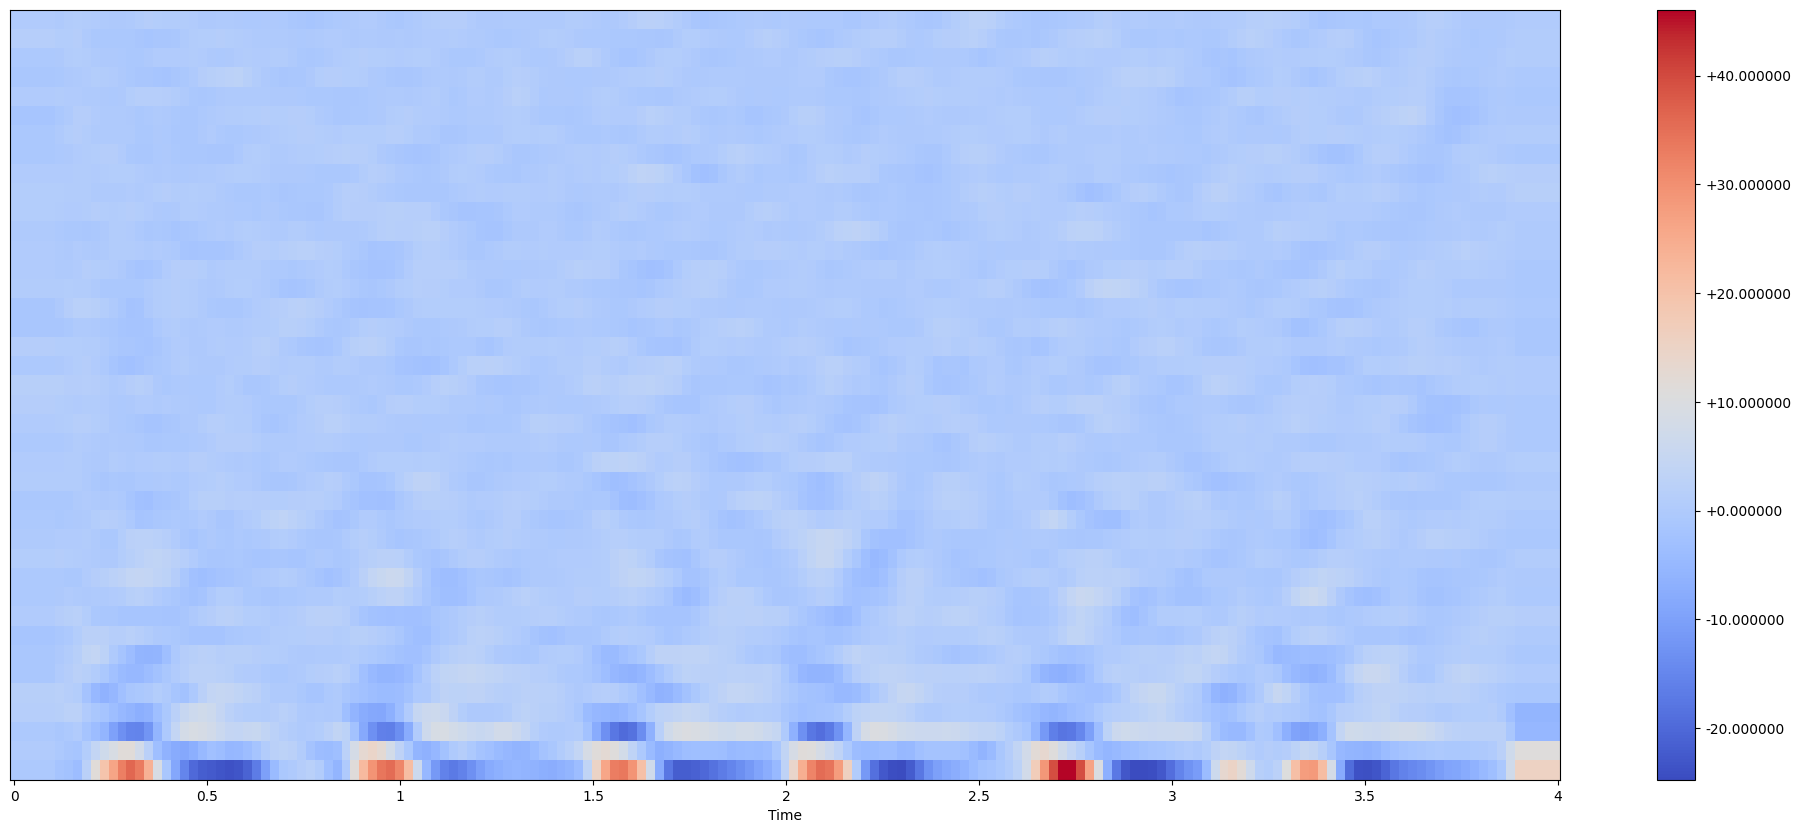

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfccs,x_axis='time',sr=sr)
plt.colorbar(format='%+2f')
plt.show()

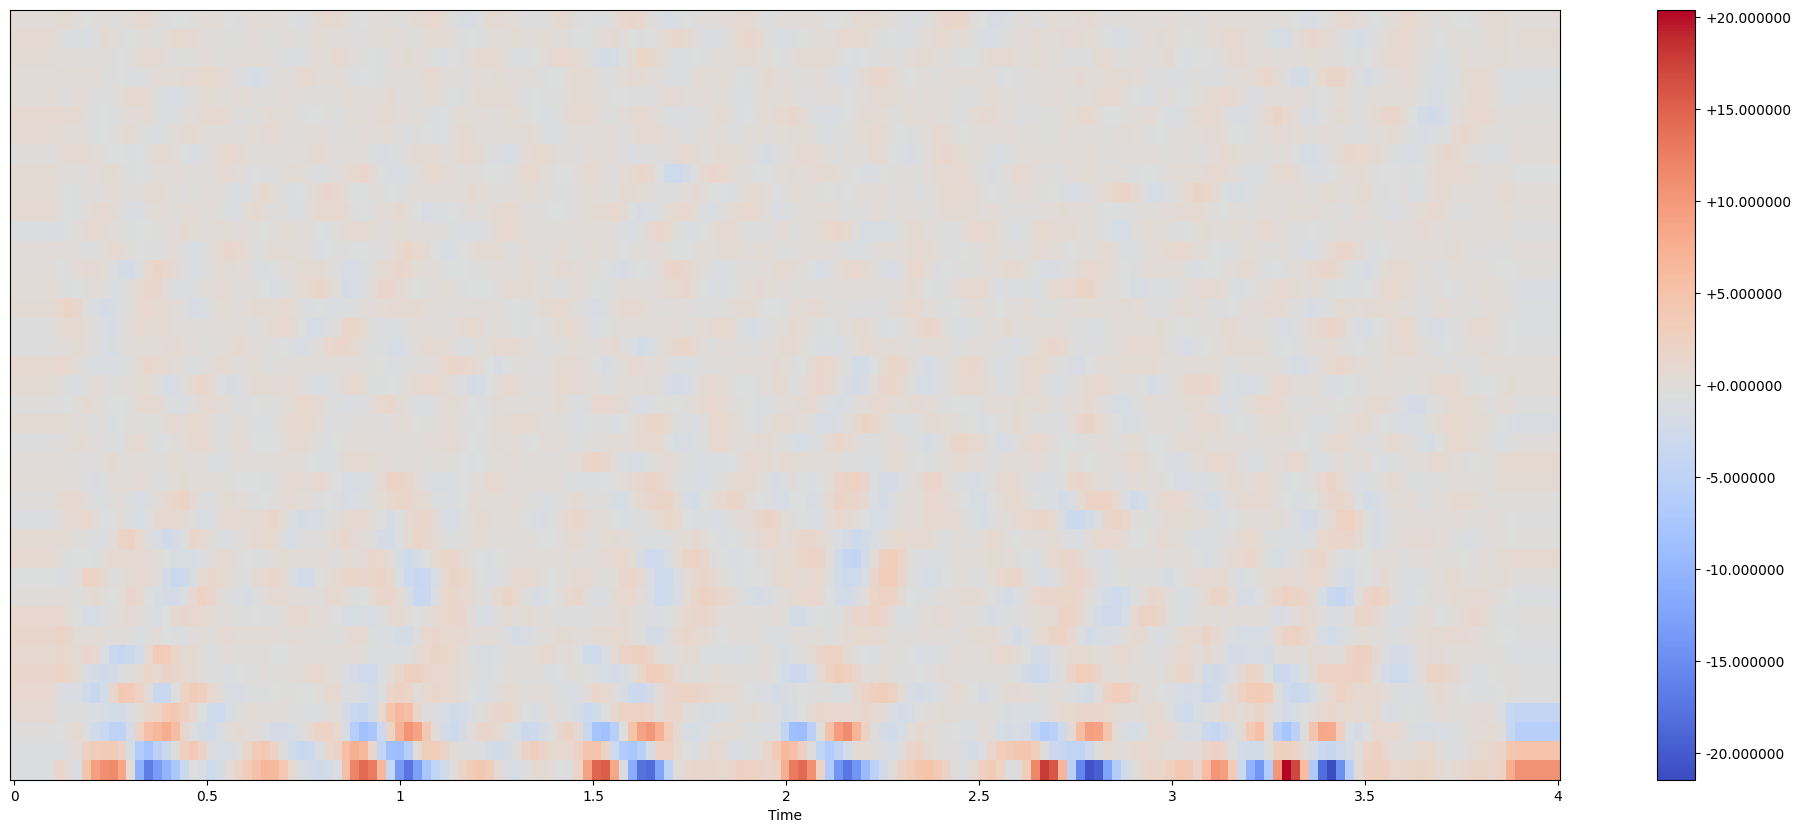

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfccs,x_axis='time',sr=sr)
plt.colorbar(format='%+2f')
plt.show()

**Create a function to extract feature**

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
### Now we iterate through every audio file and extract features
### Using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(data.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [19:54,  2.78it/s]/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [46:46,  3.50it/s]/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [46:47,  4.01it/s]/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [49:02,  2.97it/s]


In [ ]:
### Converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()


,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520653, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(8732, 40)

In [ ]:
y


array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
### Label Encoding
### y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746937e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305080e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480602e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490884e-01,  7.11009026e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886690e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### Number of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()

### First layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### Second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### Third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime


checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history=model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - ETA: 0s - loss: 12.2102 - accuracy: 0.1180
Epoch 1: val_loss improved from inf to 2.28768, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 8s 7ms/step - loss: 12.2102 - accuracy: 0.1180 - val_loss: 2.2877 - val_accuracy: 0.1007
Epoch 2/100
219/219 [==============================] - ETA: 0s - loss: 2.5803 - accuracy: 0.1173
Epoch 2: val_loss improved from 2.28768 to 2.27347, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 7ms/step - loss: 2.5803 - accuracy: 0.1173 - val_loss: 2.2735 - val_accuracy: 0.1070
Epoch 3/100
212/219 [============================>.] - ETA: 0s - loss: 2.3336 - accuracy: 0.1244
Epoch 3: val_loss improved from 2.27347 to 2.23897, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 8ms/step - loss: 2.3327 - accuracy: 0.1246 - val_loss: 2.2390 - val_accuracy: 0.14

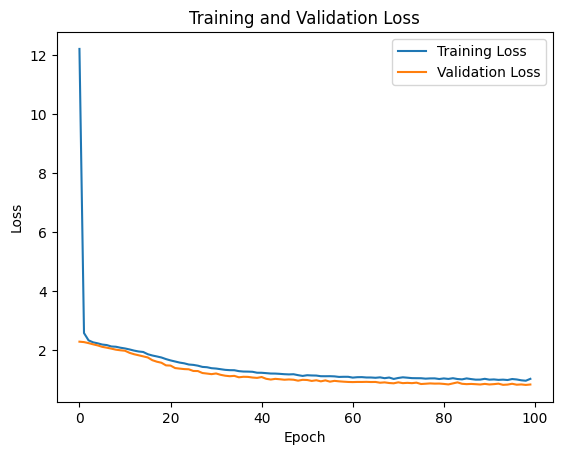

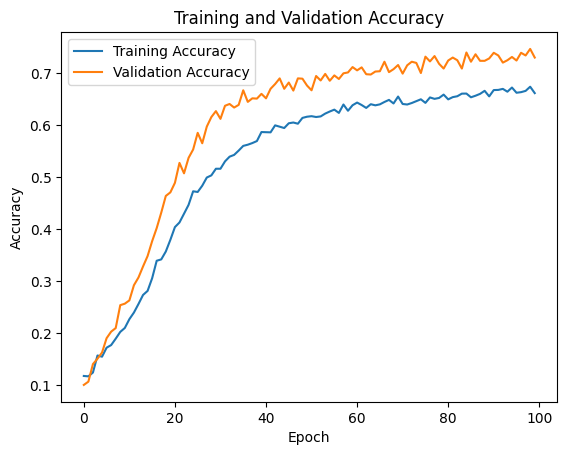

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add title and axis labels
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add title and axis labels
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7303949594497681


In [ ]:
import numpy as np

# Load the saved model

# Load the audio file and extract features
filename = '/content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-1-5.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape the features to match the input shape of the model
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Get the predicted class probabilities for the features
y_prob = model.predict(mfccs_scaled_features)

# Convert the predicted class probabilities to class labels using argmax
y_pred = np.argmax(y_prob, axis=1)

# Convert the predicted class labels back to their original string values
prediction_class = labelencoder.inverse_transform(y_pred)

# Print the predicted class label
print(prediction_class)


1/1 [==============================] - 0s 29ms/step
['street_music']


In [ ]:
# Play two audio files in the dataset.
audio_test= glob('/content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-1-5.wav')
ipd.Audio(audio_test[0])

In [ ]:
import numpy as np

# Load the saved model

# Load the audio file and extract features
filename = '/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-3.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape the features to match the input shape of the model
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Get the predicted class probabilities for the features
y_prob = model.predict(mfccs_scaled_features)

# Convert the predicted class probabilities to class labels using argmax
y_pred = np.argmax(y_prob, axis=1)

# Convert the predicted class labels back to their original string values
prediction_class = labelencoder.inverse_transform(y_pred)

# Print the predicted class label
print(prediction_class)


1/1 [==============================] - 0s 31ms/step
['dog_bark']


In [ ]:
#Play two audio files in the dataset.
audio_test= glob('/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-3.wav')
ipd.Audio(audio_test[0])